# Pet Pawpularity EDA
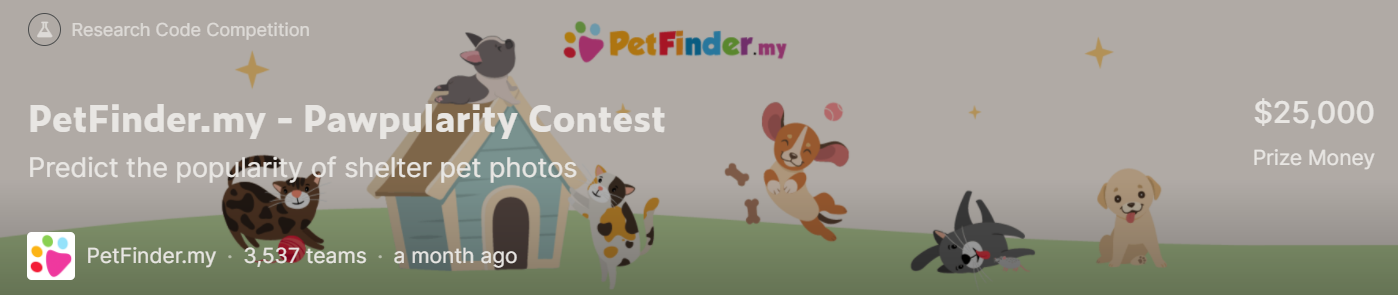

## Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from skimage.io import imread, imread_collection

from pathlib import Path
from glob import glob


import warnings
warnings.filterwarnings("ignore")

In [89]:
def show(image: np.ndarray, title="Image", cmap_type="gray", axis=False):
    """
    A function to display np.ndarrays as images
    """
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    if not axis:
        plt.axis("off")
    plt.margins(0, 0)
    plt.show();

## EDA on metada of images

In [4]:
train_df = pd.read_csv("data/raw/train.csv")
test_df = pd.read_csv("data/raw/test.csv")

In [5]:
train_df.head()

Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  
0          0      1        0      0          0     0     0           63  
1          0      0        0      0          0     0     0           42  
2          0      0        0      1          1     0     0           28  
3          0      0        0      0          0     0     0           15  
4          0      1        0      0          0     0     0           72

In [6]:
test_df.head()

Id  Subject Focus  Eyes  Face  Near  Action  \
0  4128bae22183829d2b5fea10effdb0c3              1     0     1     0       0   
1  43a2262d7738e3d420d453815151079e              0     1     0     0       0   
2  4e429cead1848a298432a0acad014c9d              0     0     0     1       0   
3  80bc3ccafcc51b66303c2c263aa38486              1     0     1     0       0   
4  8f49844c382931444e68dffbe20228f4              1     1     1     0       1   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  
0          1      1        0      0          1     0     1  
1          0      1        1      0          0     0     0  
2          1      1        1      0          1     1     1  
3          0      0        0      0          0     1     0  
4          1      0        1      0          1     1     0

In [26]:
for col in train_df.columns.tolist()[:-1]:
    train_df[col] = train_df[col].astype("category")

In [30]:
train_df.drop("Id", axis=1).describe(exclude=np.number)

Subject Focus  Eyes  Face  Near  Action  Accessory  Group  Collage  \
count            9912  9912  9912  9912    9912       9912   9912     9912   
unique              2     2     2     2       2          2      2        2   
top                 0     1     1     1       0          0      0        0   
freq             9638  7658  8960  8540    9813       9240   8630     9420   

        Human  Occlusion  Info  Blur  
count    9912       9912  9912  9912  
unique      2          2     2     2  
top         0          0     0     0  
freq     8264       8207  9305  9214

In [48]:
print(f"There are {len(train_df)} observations in the metadata for"
        f"training images with {train_df.shape[1]} features.")

There are 9912 observations in the metadata fortraining images with 14 features.


In [46]:
print(f"There are {len(test_df)} observations in the metadata for testing images.")

There are 8 observations in the metadata for testing images.


In [183]:
train_df.isna().sum().sum()

0

In [184]:
print(f"There are no missing values in the dataset.")

There are no missing values in the dataset.


In [24]:
train_df['Pawpularity'].describe()

count    9912.000000
mean       38.039044
std        20.591990
min         1.000000
25%        25.000000
50%        33.000000
75%        46.000000
max       100.000000
Name: Pawpularity, dtype: float64

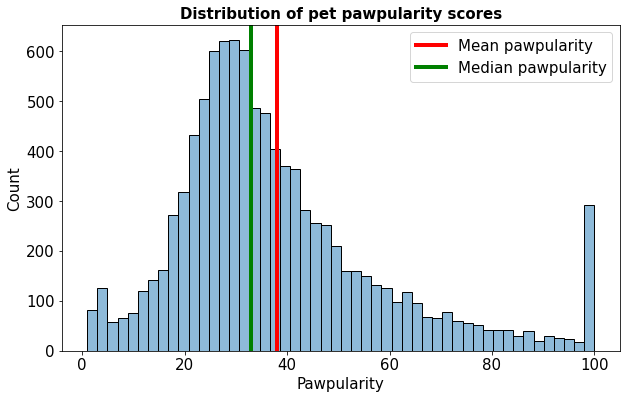

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(train_df['Pawpularity'], ax=ax, bins=50, alpha=.5)

ax.set_title("Distribution of pet pawpularity scores", weight="bold", size=15)
plt.rc("axes", labelsize=15)

mean_pawpularity = train_df['Pawpularity'].mean()
median_pawpularity = train_df['Pawpularity'].median()
ax.axvline(mean_pawpularity, lw=4, color="r", label="Mean pawpularity")
ax.axvline(median_pawpularity, lw=4, color="green", label="Median pawpularity")

ax.legend();

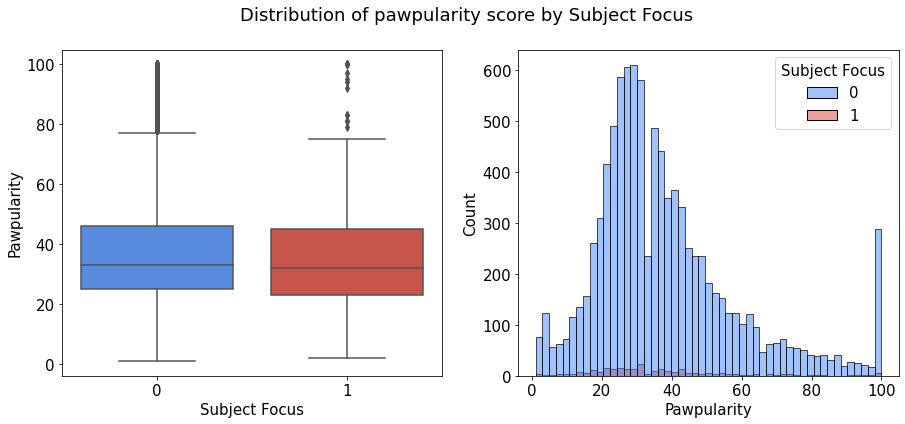

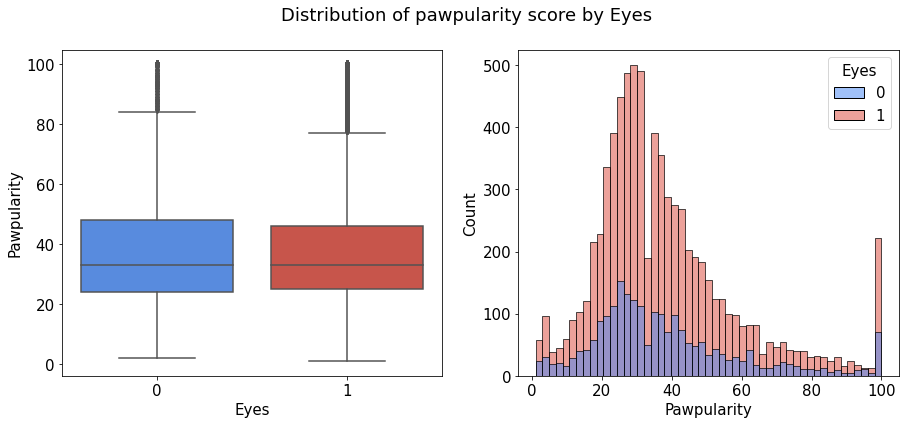

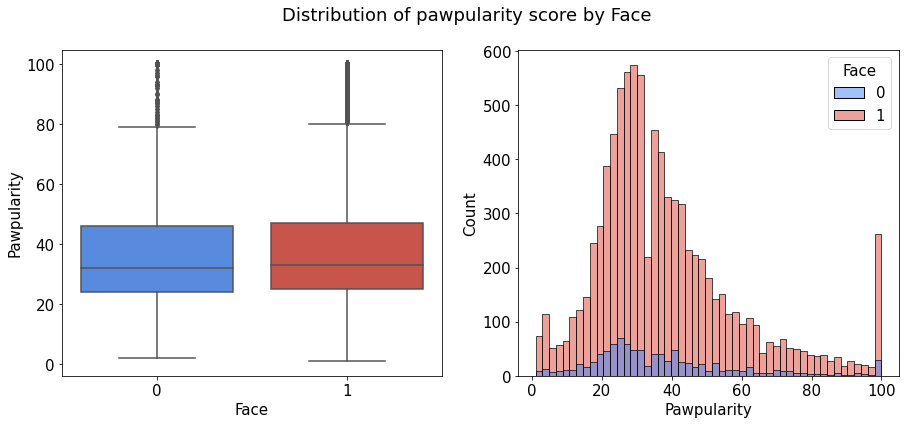

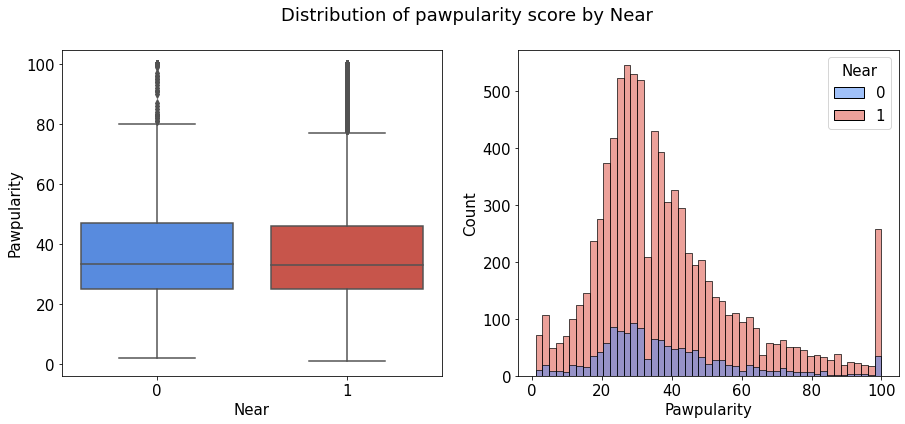

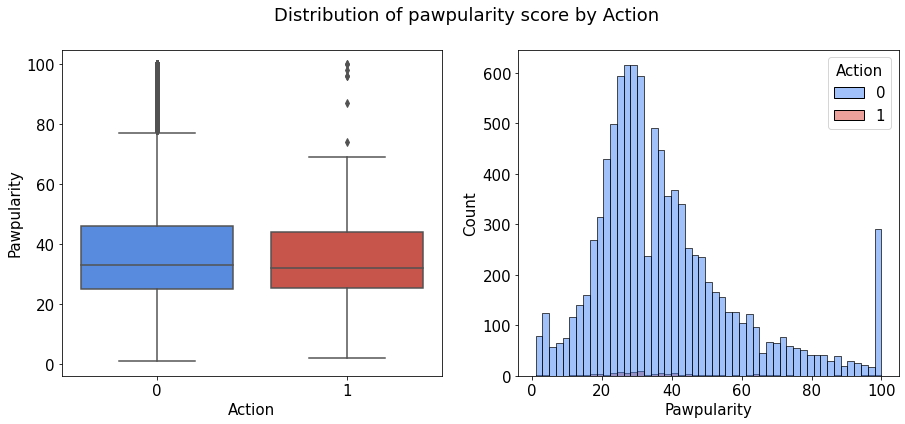

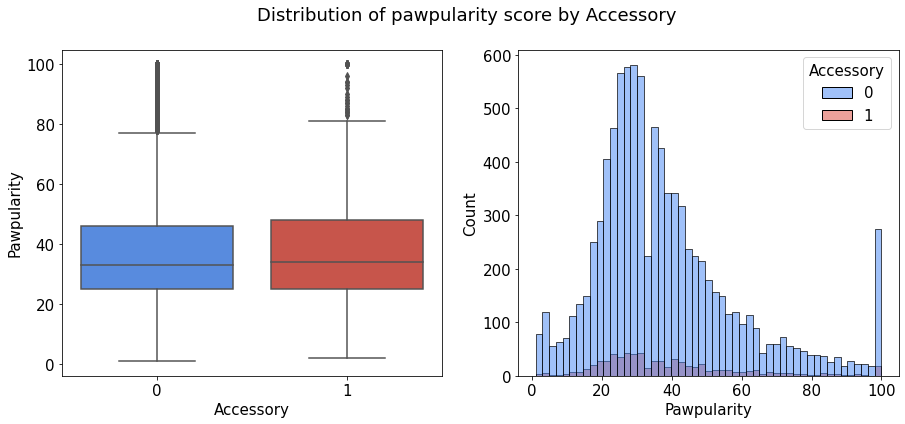

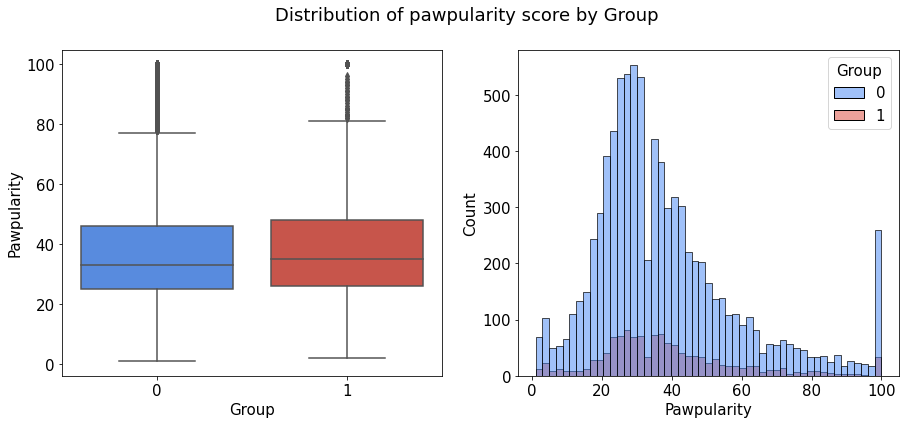

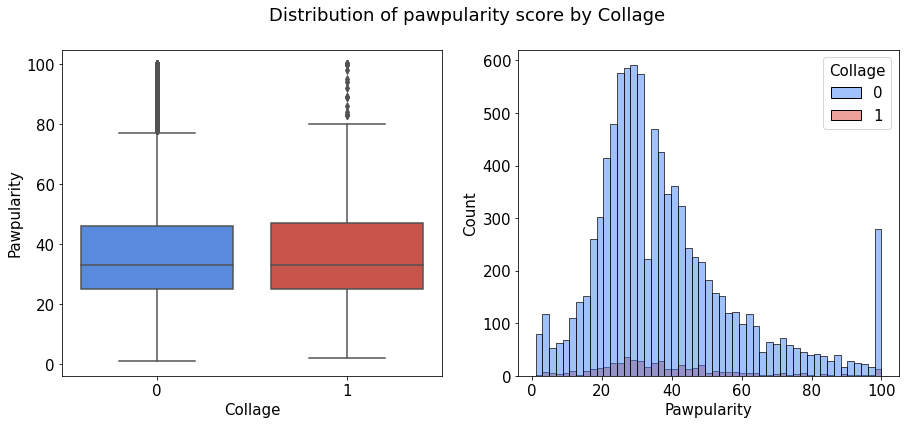

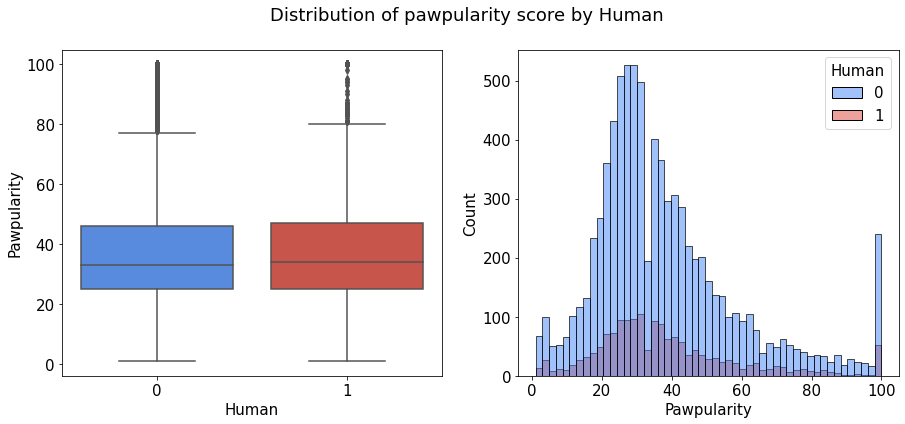

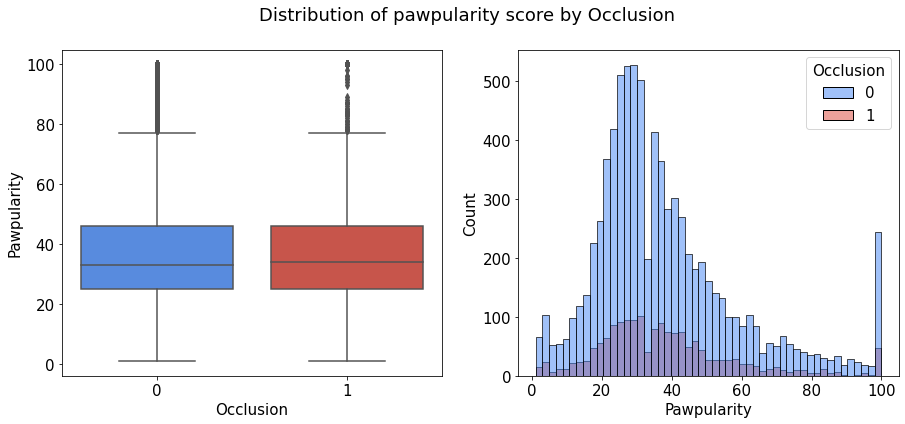

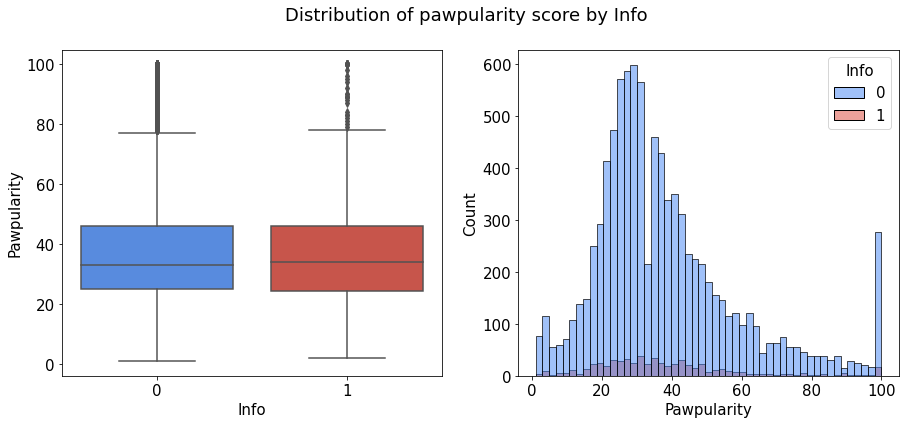

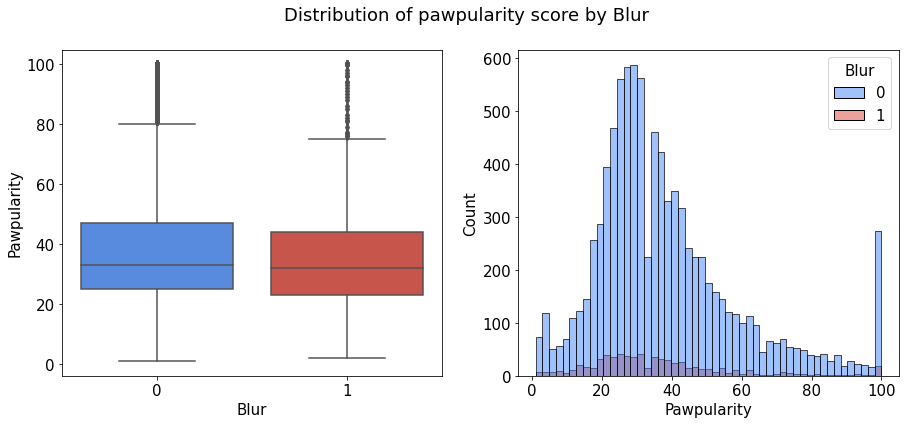

In [58]:
col_list = train_df.drop(["Id", "Pawpularity"], axis=1).columns.tolist()
target_name = "Pawpularity"
google_red_green = ['#4285F4', '#DB4437']

for col in col_list:
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    sns.boxplot(x=train_df[col], y=train_df[target_name], ax=ax1, palette=google_red_green)
    sns.histplot(x=target_name, hue=col, data=train_df, ax=ax2, palette=google_red_green)
    
    fig.suptitle(f"Distribution of pawpularity score by {col}")

In [135]:
def draw_random_image(image_list):
    """A function to load random image path from a list."""
    img_rand = np.random.choice(image_list)
    
    show(imread(img_rand))

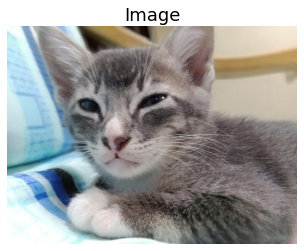

In [181]:
draw_random_image(image_paths_train)

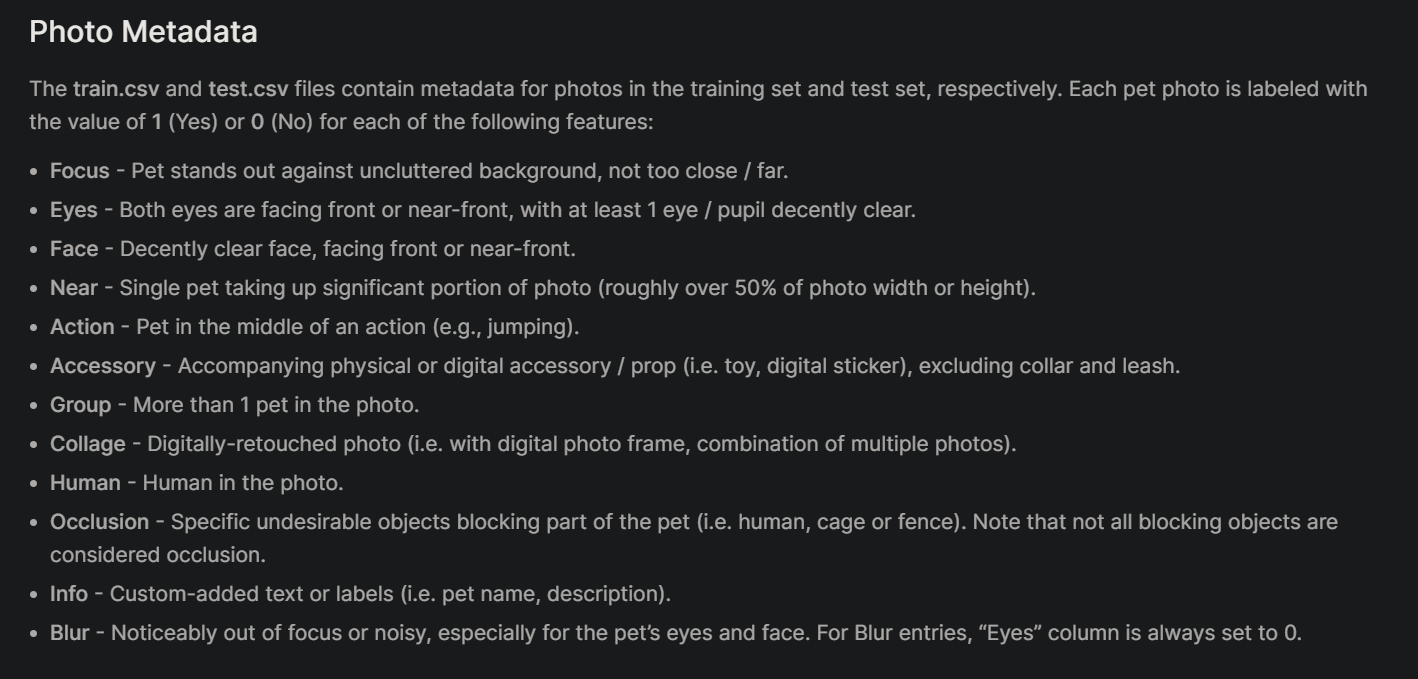

In [107]:
image_paths_train = ["data/raw/train" / Path(path).with_suffix(".jpg") for path in train_df["Id"]]

heights = list()
widths = list()

for path in image_paths_train:
    # Load the image
    image = imread(path)
    # Extract dimensions
    h, w = image.shape[0], image.shape[1]
    
    heights.append(h)
    widths.append(w)

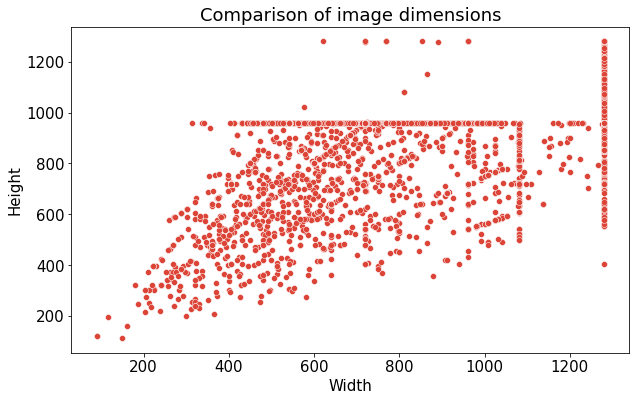

In [108]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(widths, heights, color="#DB4437", ax=ax)

ax.set(title="Comparison of image dimensions", xlabel="Width", ylabel="Height");

In [174]:
def show_pawpularity_level(df, n=5, pawpularity=100):
    """
    A function to draw `n` number of random images at the given `pawpularity` level.
    """
    images_rnd = df[df['Pawpularity'] == pawpularity].sample(n)["Id"]
    
    fig, axes = plt.subplots(1, n, figsize=(n*5, 6))
    
    for ax, img_id in zip(axes.flatten(), images_rnd):
        # Load the image
        path = "data/raw/train" / Path(img_id).with_suffix(".jpg")
        image = imread(path)
        
        ax.imshow(image)
        # Turn off axis
        ax.axis("off")
    fig.suptitle(f"Pets at pawpularity level {pawpularity}.", weight="bold", size=30)

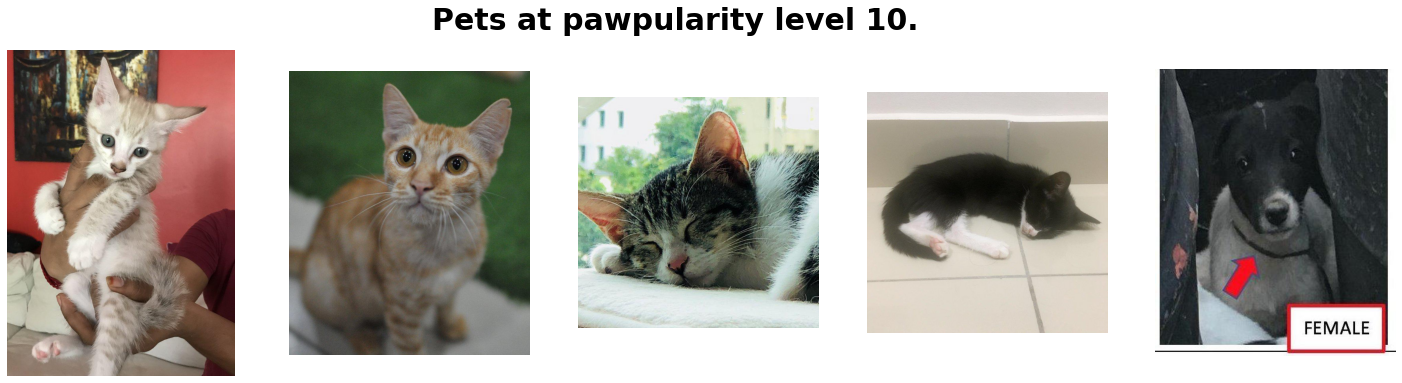

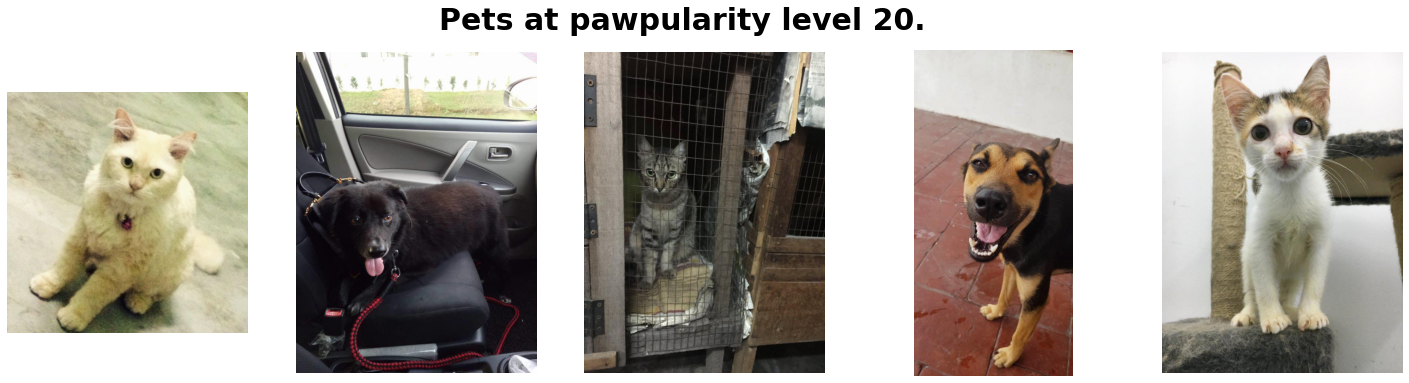

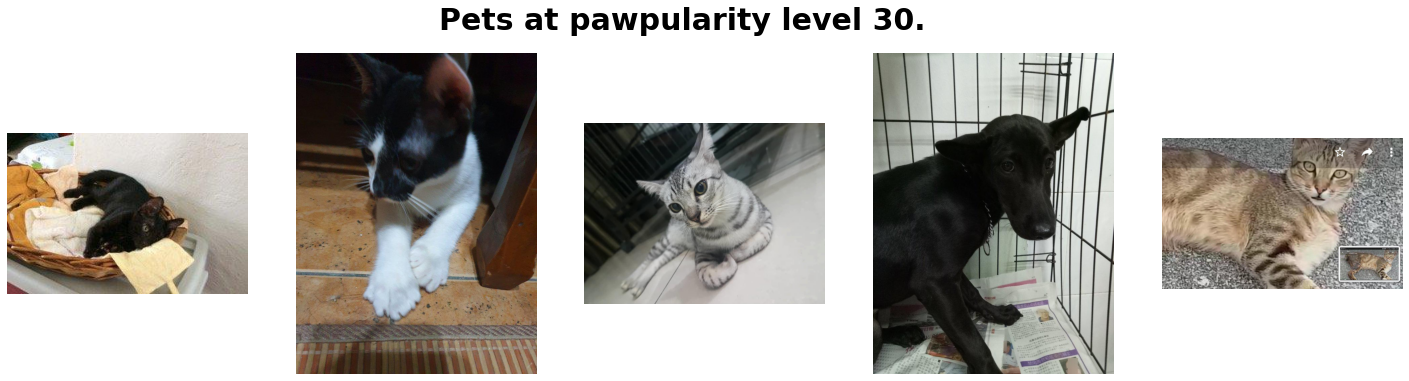

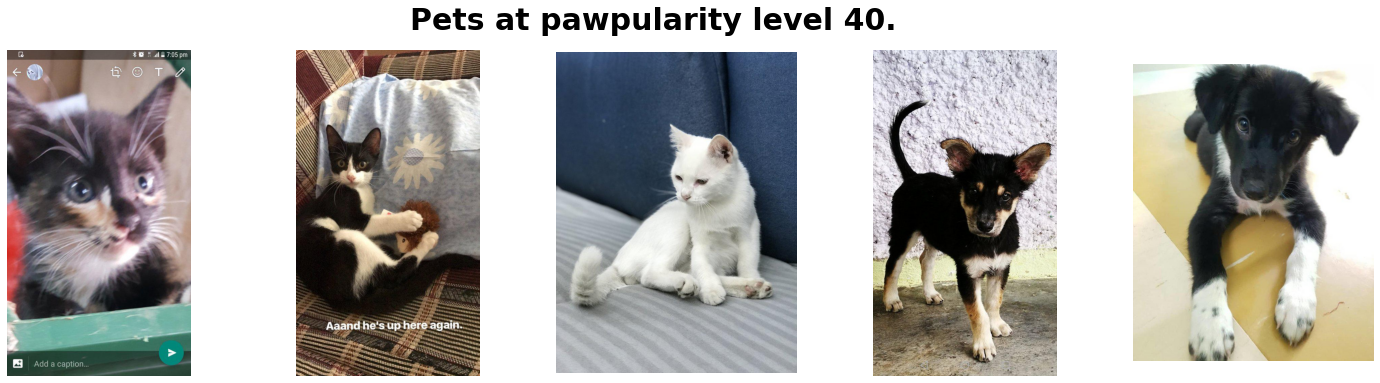

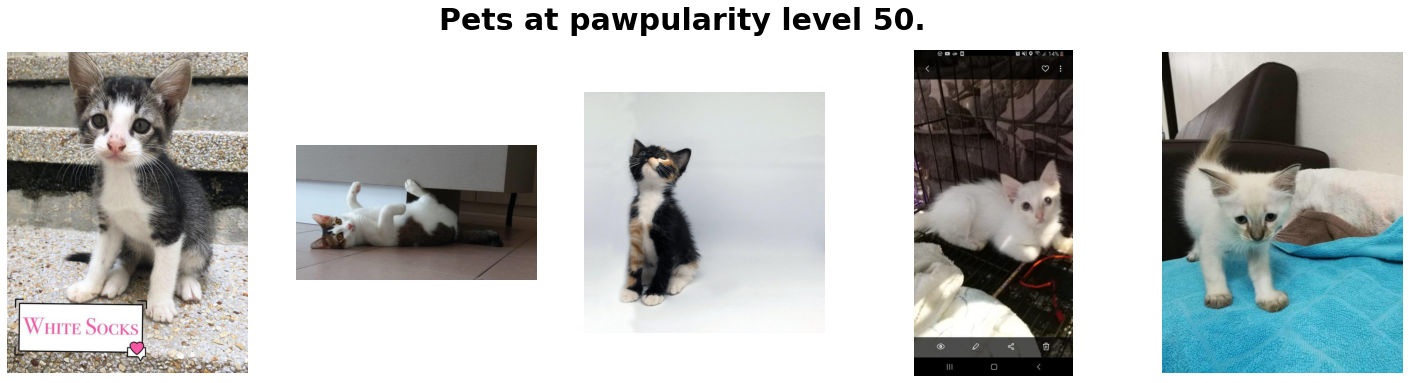

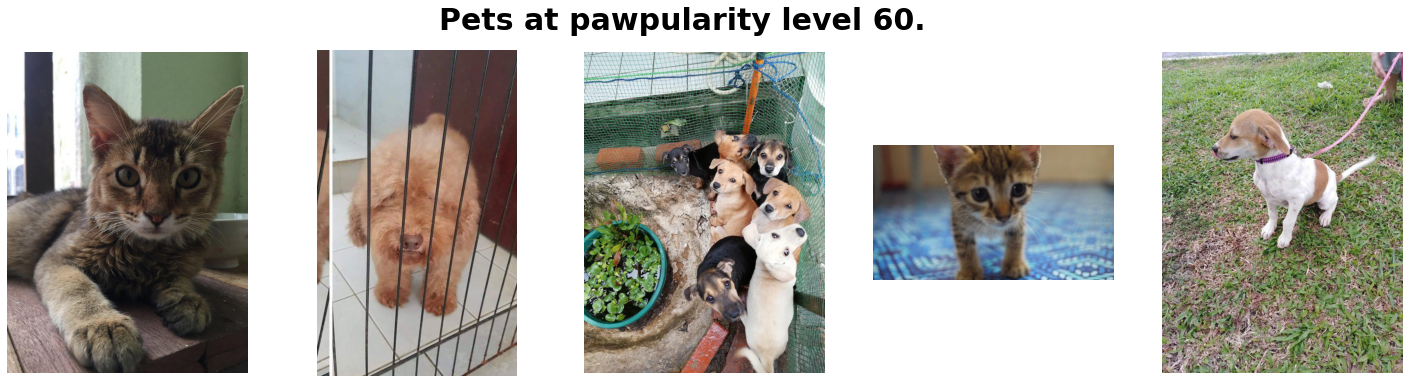

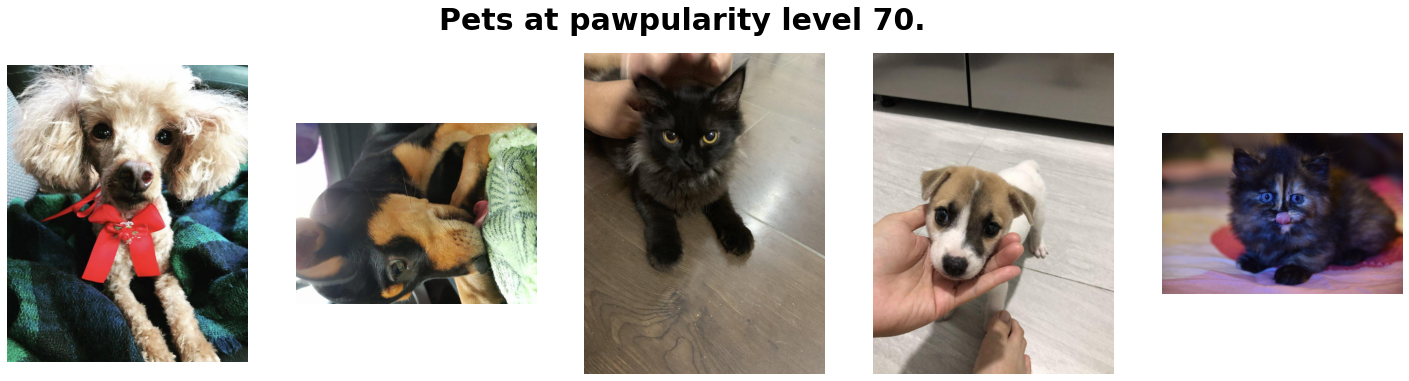

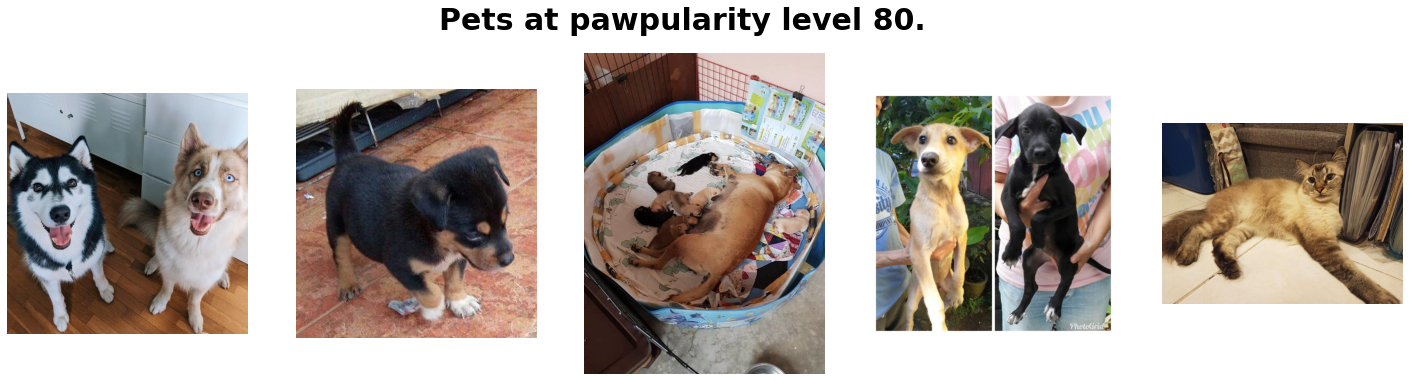

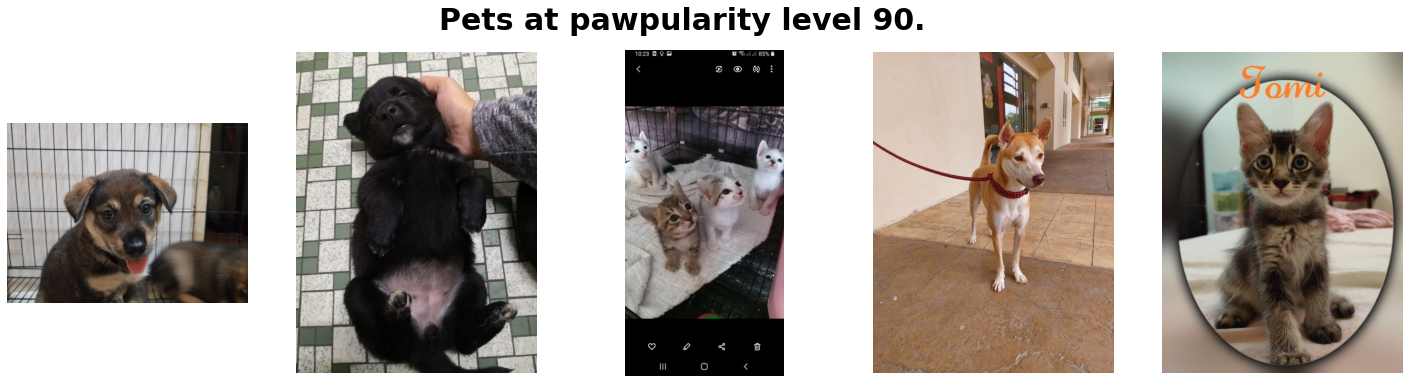

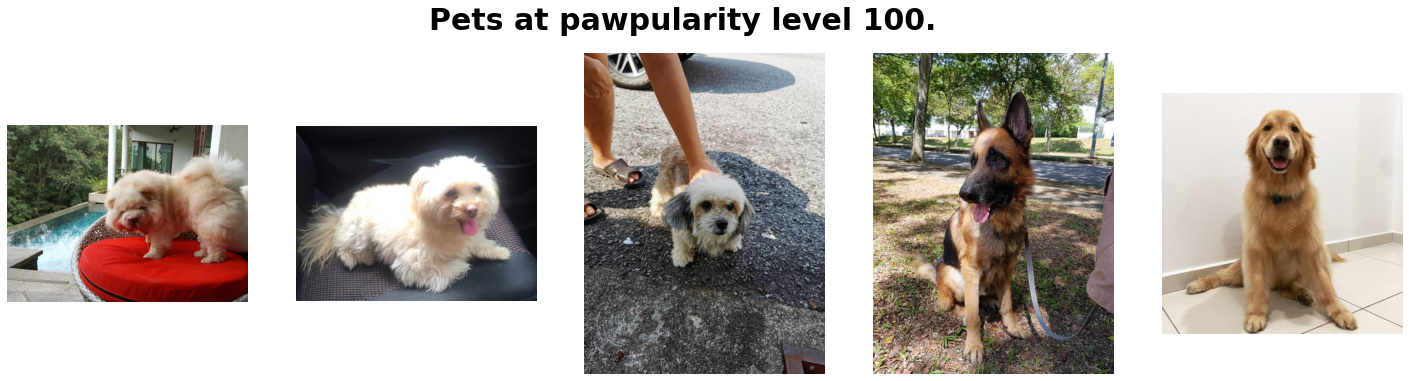

In [175]:
for level in range(10, 101, 10):
    show_pawpularity_level(train_df, pawpularity=level)